In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

packages_path = 'add_your_path_here'

sys.path.append(packages_path + 'oo_gloess')


import gloess.fitter.gloess_fitter as gf 
import gloess.fitter.gloess_plotting_options as gf_plot
import matplotlib.ticker as ticker

from pathlib import Path
from importlib import reload
import matplotlib.cm as cm


# Example using existing gloess input file

In [ ]:
df, period, smoothing, last_update = gf.read_gloess_h5('S_Vul', clean=True)

In [45]:
df

,JD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,mag_G,mag_BP,mag_RP,err_G,err_BP,err_RP,mag_K,err_K,mag_g,err_g
0,2.444811e+06,NaN,NaN,11.17,NaN,9.44,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.444822e+06,NaN,NaN,10.70,NaN,9.14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.444840e+06,NaN,NaN,10.53,NaN,8.96,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.444870e+06,NaN,NaN,11.14,NaN,9.31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.444874e+06,NaN,NaN,11.17,NaN,9.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,5.535998e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1605,5.536227e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1606,5.536668e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1607,5.536822e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
period

69.467416955503

In [47]:
smoothing

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [48]:
last_update

'20250602'

In [49]:
target = 'S Vul'

Saved gloess fit to S_Vul_gloess_fit.csv


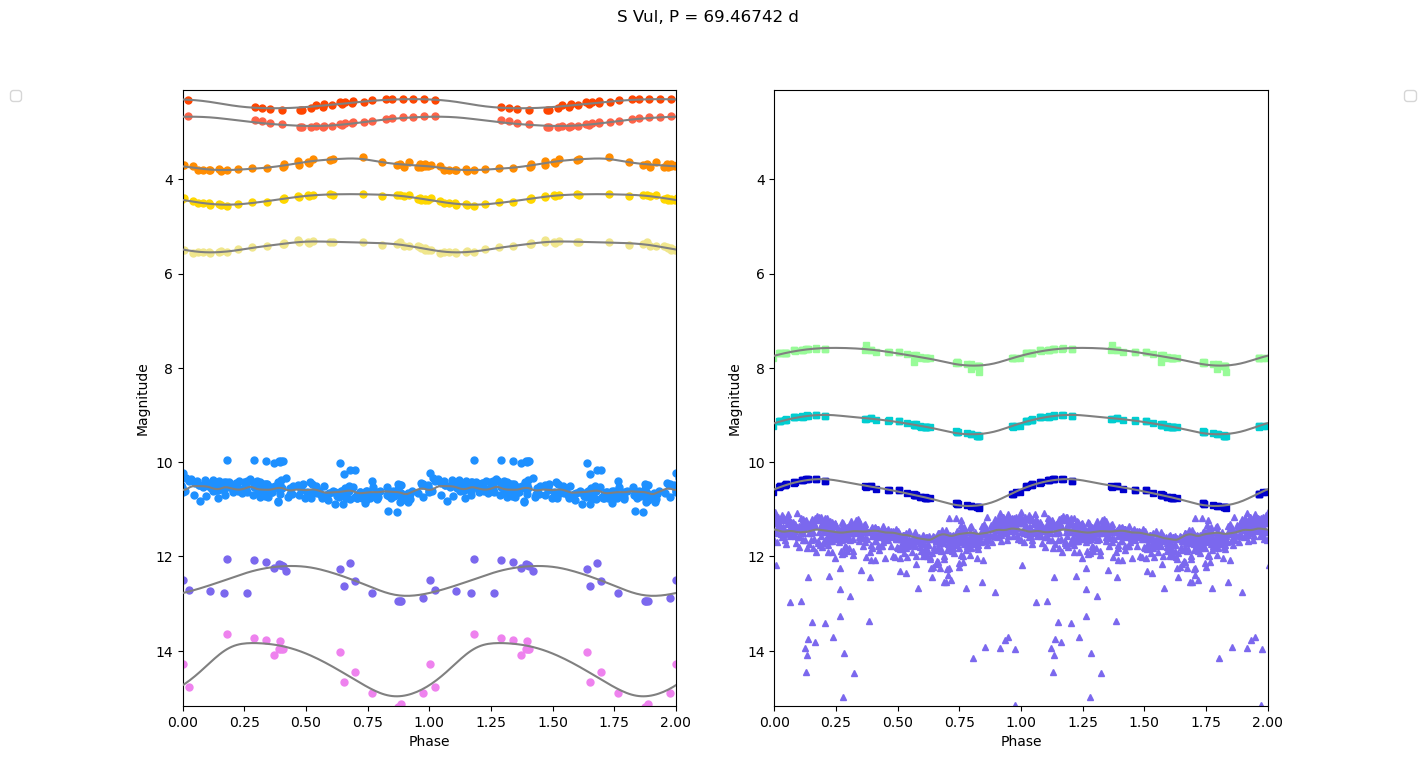

In [56]:
target_fit, target_gloess, filters, fig, target_avs, target_intavs, target_amps, target_phase_offset = gf.gloess_fit_plot_df(df, target=target, period = period, return_means=True, multi_panel=False, save_pdf=False, phase_ref_band='G')


For these plots I've used `multi_panel=False`. This puts all the light curves on the same two subplots. Johnsons-Cousins and other "standard" bands (i.e. used in lots of surveys) are on the left, "non-standard" bands (e.g. Gaia, other mission specific bands) are on the right. Useful for when you've got a lot of data in many bands. 

`fig` stores the figure object, so you can add stuff, change axes etc as you wish. 

## Fit results

Fit results are in the `target_fit` variable. This is a `N x 500` array, where `N` is the number of bands. 

The 500 data points for each band are the fit magnitudes over 5 cycles. The phases (i.e. x values of the plot) are given by:

```python

fake_phases = -0.99 + 0.01*(np.arange(0,500))
fake_phases = (fake_phases - ref_phase)
if np.min(fake_phases) < -1.5:
            fake_phases = fake_phases + 1.
            phase_offset = ref_phase + 1.
```

where `ref_phase = 0` by default, or is the phase of the reference point if you've asked it to phase to a specific JD or band. 

## Output fit file

The code defaults to saving the fit to a csv file. Default name is `target_gloess_fit.csv` where `target` is the name of your star. 

If you're wanting to use the fit to make a template light curve, I suggest using the data in this file. File contains phase and fitted magnitude in each band for 200 data points - i.e. two cycles in steps of delta_phi = 0.01.

Use this rather than the full 500 points. The full set gets affected by boundary conditions so this takes the middle 200 points. 

# Example using data directly from Gaia

Example target = RZ Cep

First get the source_id

In [35]:
target = 'RZ Cep'
source_id = gf.vs.get_gaia_source_id(target)

In [36]:
source_id

'2211629018927324288'

In [37]:
df = gf.read_gaia_epoch_photometry_from_query(source_id)

In [38]:
df

,mag_G,mag_BP,mag_RP,JD,err_G,err_BP,err_RP
0,9.213089,NaN,NaN,2.456894e+06,0.003374,NaN,NaN
1,9.438482,NaN,NaN,2.456931e+06,0.003032,NaN,NaN
2,9.034801,NaN,NaN,2.456931e+06,0.002836,NaN,NaN
3,9.092984,NaN,NaN,2.456972e+06,0.003150,NaN,NaN
4,9.334669,NaN,NaN,2.456990e+06,0.003728,NaN,NaN
...,...,...,...,...,...,...,...
41,NaN,NaN,8.683269,2.457745e+06,NaN,NaN,0.002923
42,NaN,NaN,8.619356,2.457812e+06,NaN,NaN,0.002919
43,NaN,NaN,8.776965,2.457840e+06,NaN,NaN,0.002944
44,NaN,NaN,8.955656,2.457840e+06,NaN,NaN,0.002811


In [39]:
period = gf.vs.get_gaia_period(source_id, var_type='rrl', period_col='p1_o')

INFO: Query finished. [astroquery.utils.tap.core]


In [40]:
period

0.3087043245277305

9.251449031804183 9.84154107935484 0.590092047550657 0.590092047550657
9.010566776992691 9.509072026560625 0.4985052495679341 0.4985052495679341
8.609113946561486 8.984945946042984 0.37583199948149826 0.37583199948149826
Saved gloess fit to RZ_Cep_gloess_fit.csv


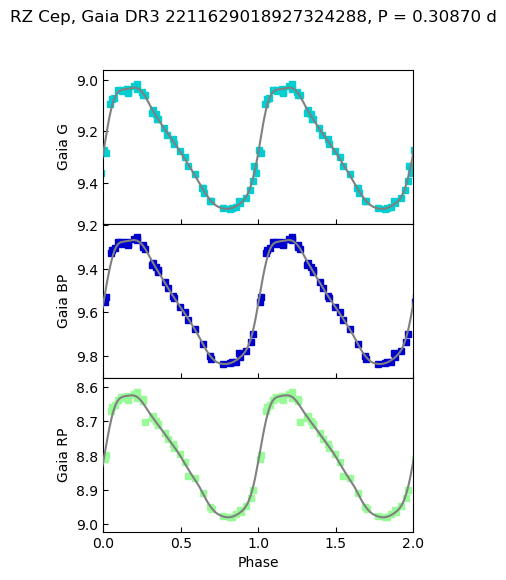

In [41]:
target_fit, target_gloess, filters, fig, target_avs, target_intavs, target_amps, target_phase_offset = gf.gloess_fit_plot_df(df, target=target, period = period, return_means=True, multi_panel=True, save_pdf=False, phase_ref_band='G', source_id=source_id)


If you've only got Gaia data it's better to use the `multi_panel=True` option for plotting. This puts each band in a separate subplot. `multi_panel=False` is good for when you want to look at all the data many bands. 